# Growth Limiation - Create a grid of factor most limiting growth at each year for summer months, for each phytoplankton group... throuhout a few locations of the Arctic Ocean. This should go along with the seasonal succession plot to be able to understand more clarely what is happening between these two different sectors. 
1. Target two locations that show strong interannual differences in TL, or biomass. 
2. Plot the factor most limiting growth at each one of these grid cells. 
3. Plot the anomalies in temperature, light and ice fraction for each of these grid cells

In [1]:
import warnings
warnings.simplefilter("ignore") # Silence warnings
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
#import hvplot.xarray
import xarray as xr
import numpy as np
from matplotlib.pyplot import figure
import numpy.ma as ma
from netCDF4 import Dataset as NetCDFFile
import glob
import cartopy
import cartopy.crs as ccrs
import pylab 
from copy import deepcopy

In [2]:
def adjust_pop_grid(tlon,tlat,field):
    nj = tlon.shape[0]
    ni = tlon.shape[1]
    xL = int(ni/2 - 1)
    xR = int(xL + ni)

    tlon = np.where(np.greater_equal(tlon,np.min(tlon[:,0])),tlon-360.,tlon)
    lon  = np.concatenate((tlon,tlon+360.),1)
    lon = lon[:,xL:xR]

    if ni == 320:
        lon[367:-3,0] = lon[367:-3,0]+360.
    lon = lon - 360.
    lon = np.hstack((lon,lon[:,0:1]+360.))
    if ni == 320:
        lon[367:,-1] = lon[367:,-1] - 360.

    #-- trick cartopy into doing the right thing:
    #   it gets confused when the cyclic coords are identical
    lon[:,0] = lon[:,0]-1e-8

    #-- periodicity
    lat  = np.concatenate((tlat,tlat),1)
    lat = lat[:,xL:xR]
    lat = np.hstack((lat,lat[:,0:1]))

    field = np.ma.concatenate((field,field),1)
    field = field[:,xL:xR]
    field = np.ma.hstack((field,field[:,0:1]))
    return lon,lat,field

In [3]:
import re
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

In [4]:
path = '/glade/campaign/cesm/development/bgcwg/projects/marbl-spectra/GNG595_2ndcycle_1990-2009_clim'
files = sorted(glob.glob(f'{path}/*.nc', recursive=True),key=numericalSort)
ds= xr.open_mfdataset(files,combine='by_coords')

## Check what these files are, because they could save a lot of time... 

In [5]:
diat3_ind = xr.open_mfdataset('/glade/u/home/gabyn/scratch/SPECTRA/growth_lim/diat3_lim_index_remap.nc', decode_times=False)
pp_ind = xr.open_mfdataset('/glade/u/home/gabyn/scratch/SPECTRA/growth_lim/pp_lim_index_remap.nc',decode_times=False)
diat2_ind = xr.open_mfdataset('/glade/u/home/gabyn/scratch/SPECTRA/growth_lim/diat2_lim_index_remap.nc',decode_times=False)
diat1_ind = xr.open_mfdataset('/glade/u/home/gabyn/scratch/SPECTRA/growth_lim/diat1_lim_index_remap.nc',decode_times=False)
mp1_ind = xr.open_mfdataset('/glade/u/home/gabyn/scratch/SPECTRA/growth_lim/mp1_lim_index_remap.nc',decode_times=False)
mp2_ind = xr.open_mfdataset('/glade/u/home/gabyn/scratch/SPECTRA/growth_lim/mp2_lim_index_remap.nc',decode_times=False)
mp3_ind = xr.open_mfdataset('/glade/u/home/gabyn/scratch/SPECTRA/growth_lim/mp3_lim_index_remap.nc',decode_times=False)
mp4_ind = xr.open_mfdataset('/glade/u/home/gabyn/scratch/SPECTRA/growth_lim/mp4_lim_index_remap.nc',decode_times=False)

	NC4_open: path /glade/u/home/gabyn/scratch/SPECTRA/growth_lim/diat3_lim_index_remap.nc mode 4096 params 0
	HDF5 error messages turned on.
			nc4_open_file: path /glade/u/home/gabyn/scratch/SPECTRA/growth_lim/diat3_lim_index_remap.nc mode 4096
			nc4_grp_list_add: name / 
			nc4_rec_read_metadata: grp->hdr.name /
			found dataset time
			found dataset lon
			found dataset lat
			found dataset month
			found dataset diat3_lim_index
ERROR: Invalid _NCProperties attribute
		*** NetCDF-4 Internal Metadata: int_ncid 0xd0000 ext_ncid 0xd0000
		FILE - path: /glade/u/home/gabyn/scratch/SPECTRA/growth_lim/diat3_lim_index_remap.nc cmode: 0x1008 parallel: 0 redef: 0 fill_mode: 0 no_write: 1 next_nc_grpid: 1
		 GROUP - / nc_grpid: 0 nvars: 5 natts: 0
		 DIMENSION - dimid: 0 name: time len: 63 unlimited: 1
		 DIMENSION - dimid: 1 name: lon len: 360 unlimited: 0
		 DIMENSION - dimid: 2 name: lat len: 180 unlimited: 0
		 DIMENSION - dimid: 3 name: month len: 12 unlimited: 0
		 VARIABLE - varid: 0 nam

In [6]:
diat3_val = xr.open_mfdataset('/glade/u/home/gabyn/scratch/SPECTRA/growth_lim/diat3_lim_value_remap.nc', decode_times=False)
pp_val = xr.open_mfdataset('/glade/u/home/gabyn/scratch/SPECTRA/growth_lim/pp_lim_value_remap.nc',decode_times=False)
diat2_val = xr.open_mfdataset('/glade/u/home/gabyn/scratch/SPECTRA/growth_lim/diat2_lim_value_remap.nc',decode_times=False)
diat1_val = xr.open_mfdataset('/glade/u/home/gabyn/scratch/SPECTRA/growth_lim/diat1_lim_value_remap.nc',decode_times=False)
mp1_val = xr.open_mfdataset('/glade/u/home/gabyn/scratch/SPECTRA/growth_lim/mp1_lim_value_remap.nc',decode_times=False)
mp2_val = xr.open_mfdataset('/glade/u/home/gabyn/scratch/SPECTRA/growth_lim/mp2_lim_value_remap.nc',decode_times=False)
mp3_val = xr.open_mfdataset('/glade/u/home/gabyn/scratch/SPECTRA/growth_lim/mp3_lim_value_remap.nc',decode_times=False)
mp4_val = xr.open_mfdataset('/glade/u/home/gabyn/scratch/SPECTRA/growth_lim/mp4_lim_value_remap.nc',decode_times=False)

C4_inq_var_all: ncid 0x140000 varid 2
		NC4_inq_dim: ncid 0x140000 dimid 2
		NC4_inq_att: ncid 0x140000 varid 2 name scale_factor
			nc4_get_att: ncid 0x140000 varid 2 name scale_factor attnum -1 mem_type 0
		NC4_inq_att: ncid 0x140000 varid 2 name add_offset
			nc4_get_att: ncid 0x140000 varid 2 name add_offset attnum -1 mem_type 0
		NC4_inq_var_all: ncid 0x140000 varid 3
		NC4_inq_var_all: ncid 0x140000 varid 3
		NC4_inq_dim: ncid 0x140000 dimid 3
		NC4_inq_dim: ncid 0x140000 dimid 3
		NC4_inq_var_all: ncid 0x140000 varid 3
		NC4_inq_var_all: ncid 0x140000 varid 3
		NC4_inq_dim: ncid 0x140000 dimid 3
		NC4_inq_var_all: ncid 0x140000 varid 3
		NC4_inq_var_all: ncid 0x140000 varid 3
		NC4_inq_dim: ncid 0x140000 dimid 3
		NC4_inq_var_all: ncid 0x140000 varid 3
			NC4_get_vars: var->hdr.name month mem_nc_type 6
		NC4_inq_var_all: ncid 0x140000 varid 3
		NC4_inq_var_all: ncid 0x140000 varid 3
		NC4_inq_dim: ncid 0x140000 dimid 3
		NC4_inq_att: ncid 0x140000 varid 3 name scale_factor
			nc

In [7]:
diat3_val.diat3_lim_value

<xarray.DataArray 'diat3_lim_value' (time: 63, month: 12, lat: 180, lon: 360)>
dask.array<open_dataset-4b72a8f85a3d34b2b479c4bbdc50fbafdiat3_lim_value, shape=(63, 12, 180, 360), dtype=float64, chunksize=(63, 12, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * month    (month) float64 2.266e+04 2.269e+04 2.272e+04 ... 2.296e+04 2.3e+04
Attributes:
    long_name:  diatom 3 maximum limitation value, carbon biomass weighted av...

## Set up colorbar

In [8]:
# colors for each variable 
# temperature (Blue)
temperature3 = ''
temperature        = '#e0f3f8'
temperature1       = '#abd9e9'
temperature2       = '#74add1'
# light (yellow)
light2   = '#fdae61'
light1   ='#fee090'
light   ='#ffffbf'
light3=''
# nutrients (Green)
nitrate     = '#AFE1AF'
nitrate1     ='#00A36C'
nitrate2     ='#097969'

from matplotlib.colors import LinearSegmentedColormap
color_temp = [temperature,temperature1,temperature2]
color_light = [light,light1,light2]
color_nutrients = [nitrate,nitrate1,nitrate2]

cmap_name = 'my_list'
cm_temp = LinearSegmentedColormap.from_list(
        cmap_name, color_temp, N=3)
cm_light = LinearSegmentedColormap.from_list(
        cmap_name, color_light, N=3)
cm_nutrients = LinearSegmentedColormap.from_list(
        cmap_name, color_nutrients, N=3)

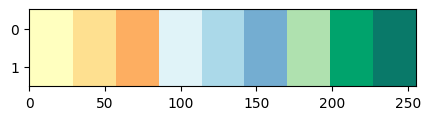

In [9]:
N = 3 # number of colors to extract from each of the base_cmaps below
phyto = [cm_light,cm_temp,cm_nutrients]

n_base = len(phyto)
# we go from 0.2 to 0.8 below to avoid having several whites and blacks in the resulting cmaps
colors_phyto = np.concatenate([plt.get_cmap(name)(np.linspace(0,1,N)) for name in phyto])
cm_phyto = mpl.colors.ListedColormap(colors_phyto)

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots(1,1,figsize=(5,1))
ax.imshow(gradient, aspect='auto', cmap=cm_phyto)

In [10]:
from matplotlib.colors import LinearSegmentedColormap
colors = [(0.9994925028835063, 0.9192618223760093, 0.6061361014994233),(0.45066769191336664, 0.7509983339741125, 0.7703857490708702),(0.6825187635707243, 0.810691907283208, 0.6352470180118206)]

cmap_name = 'my_list'
cm = LinearSegmentedColormap.from_list(
        cmap_name, colors, N=3)

		NC4_inq_var_all: ncid 0xd0000 varid 4
		NC4_inq_var_all: ncid 0xd0000 varid 4
		NC4_inq_dim: ncid 0xd0000 dimid 0
		NC4_inq_dim: ncid 0xd0000 dimid 3
		NC4_inq_dim: ncid 0xd0000 dimid 2
		NC4_inq_dim: ncid 0xd0000 dimid 1
		NC4_inq_dim: ncid 0xd0000 dimid 0
			nc4_find_dim_len: grp->name / dimid 0
		NC4_inq_dim: ncid 0xd0000 dimid 3
		NC4_inq_dim: ncid 0xd0000 dimid 2
		NC4_inq_dim: ncid 0xd0000 dimid 1
		NC4_inq_var_all: ncid 0xd0000 varid 4
		NC4_inq_var_all: ncid 0xd0000 varid 4
		NC4_inq_dim: ncid 0xd0000 dimid 0
		NC4_inq_dim: ncid 0xd0000 dimid 3
		NC4_inq_dim: ncid 0xd0000 dimid 2
		NC4_inq_dim: ncid 0xd0000 dimid 1
		NC4_inq_var_all: ncid 0xd0000 varid 4
		NC4_inq_var_all: ncid 0xd0000 varid 4
		NC4_inq_dim: ncid 0xd0000 dimid 0
		NC4_inq_dim: ncid 0xd0000 dimid 3
		NC4_inq_dim: ncid 0xd0000 dimid 2
		NC4_inq_dim: ncid 0xd0000 dimid 1
		NC4_inq_var_all: ncid 0xd0000 varid 4
			NC4_get_vars: var->hdr.name diat3_lim_index mem_nc_type 6
		NC4_inq_dim: ncid 0xd0000 dimid 0
			nc4

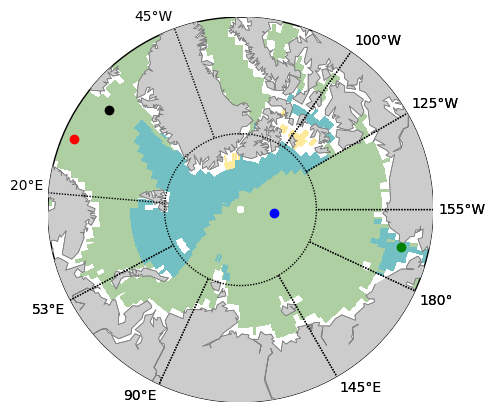

In [16]:
from mpl_toolkits.basemap import Basemap
from cartopy.util import add_cyclic_point
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
m = Basemap(projection='npstere',round=True,
            boundinglat=65,
            lon_0=180+(-100+-30)/2.,resolution='c')
diat3_lims = (diat3_val.diat3_lim_value.where(diat3_val.diat3_lim_value < 0.9) + diat3_ind.diat3_lim_index.where(diat3_val.diat3_lim_value < 0.9))
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
summer, lon = add_cyclic_point(np.nanmean(diat3_lims[:,5:8,:,:], axis=(0,1)), coord=diat3_val.lon, axis=1)
x, y = m(*np.meshgrid(lon,diat3_val.lat))
cff = m.pcolormesh(x,y,summer,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

x1, y1 = m(*np.meshgrid(diat3_val.lon[348],diat3_val.lat[158]))
m.plot(x1,y1,'o',color='k')

x1, y1 = m(*np.meshgrid(diat3_val.lon[2],diat3_val.lat[156]))
m.plot(x1,y1,'o',color='r')

x1, y1 = m(*np.meshgrid(diat3_val.lon[200],diat3_val.lat[175]))
m.plot(x1,y1,'o',color='b')

x1, y1 = m(*np.meshgrid(diat3_val.lon[192],diat3_val.lat[158]))
m.plot(x1,y1,'o',color='g')

m.drawmeridians((180,205), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((205,235), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((235,260), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((260,315), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((145,180), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((90,145), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((53,90), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((20,53), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawparallels((60,90), color='k', textcolor='k', 
                linewidth=1.0, zorder=None, dashes=[1, 1], 
                labels=[0, 0, 0, 0])
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)
m.plot
plt.show()

## Find the lons and lats for each of the regions
1. Black dot = Western Nordic Region (near greenland) `[68.5$^o$N,348$^o$E]`
2. red dot = Eastern Nordic Region `[66.5$^o$N,2$^o$E]`
3. Blue dot = Central Arctic `[85.5$^o$N, 200$^o$E]`

## Plot the regional limitaiton during the summer to make sure these are working correctly! 

		NC4_inq_var_all: ncid 0x10000 varid 4
		NC4_inq_var_all: ncid 0x10000 varid 4
		NC4_inq_dim: ncid 0x10000 dimid 0
		NC4_inq_dim: ncid 0x10000 dimid 3
		NC4_inq_dim: ncid 0x10000 dimid 2
		NC4_inq_dim: ncid 0x10000 dimid 1
		NC4_inq_dim: ncid 0x10000 dimid 0
			nc4_find_dim_len: grp->name / dimid 0
		NC4_inq_dim: ncid 0x10000 dimid 3
		NC4_inq_dim: ncid 0x10000 dimid 2
		NC4_inq_dim: ncid 0x10000 dimid 1
		NC4_inq_var_all: ncid 0x10000 varid 4
		NC4_inq_var_all: ncid 0x10000 varid 4
		NC4_inq_dim: ncid 0x10000 dimid 0
		NC4_inq_dim: ncid 0x10000 dimid 3
		NC4_inq_dim: ncid 0x10000 dimid 2
		NC4_inq_dim: ncid 0x10000 dimid 1
		NC4_inq_var_all: ncid 0x10000 varid 4
		NC4_inq_var_all: ncid 0x10000 varid 4
		NC4_inq_dim: ncid 0x10000 dimid 0
		NC4_inq_dim: ncid 0x10000 dimid 3
		NC4_inq_dim: ncid 0x10000 dimid 2
		NC4_inq_dim: ncid 0x10000 dimid 1
		NC4_inq_var_all: ncid 0x10000 varid 4
			NC4_get_vars: var->hdr.name pp_lim_value mem_nc_type 6
		NC4_inq_dim: ncid 0x10000 dimid 0
			nc4_fi

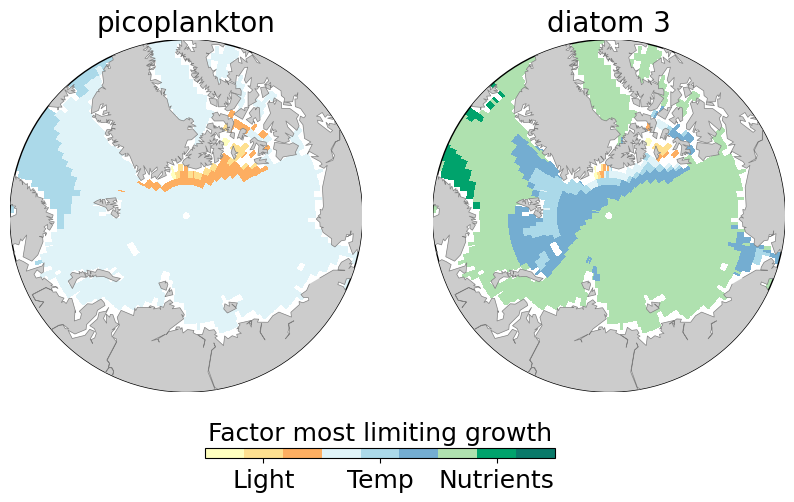

CPU times: user 6.17 s, sys: 3.92 s, total: 10.1 s
Wall time: 11.8 s


<Figure size 640x480 with 0 Axes>

In [115]:
%%time
from cartopy.util import add_cyclic_point
fig = plt.figure(figsize=(10,5))
# ------------------------- Picoplankton ---------------------------
# Summer
ax = fig.add_subplot(121) 
ax.set_title("picoplankton",fontsize=20)
pp_lims = (pp_val.pp_lim_value.where(pp_val.pp_lim_value < 0.9) + pp_ind.pp_lim_index.where(pp_val.pp_lim_value < 0.9))
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
summer, lon = add_cyclic_point(np.nanmean(pp_lims[:,5:8,:,:], axis=(0,1)), coord=diat3_val.lon, axis=1)
x, y = m(*np.meshgrid(lon,diat3_val.lat))
cf = m.pcolormesh(x,y,summer,cmap=cm_phyto, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Summer
ax = fig.add_subplot(122) 
ax.set_title("diatom 3",fontsize=20)
diat3_lims = (diat3_val.diat3_lim_value.where(diat3_val.diat3_lim_value < 0.9) + diat3_ind.diat3_lim_index.where(diat3_val.diat3_lim_value < 0.9))
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
summer, lon = add_cyclic_point(np.nanmean(diat3_lims[:,5:8,:,:], axis=(0,1)), coord=diat3_val.lon, axis=1)
x, y = m(*np.meshgrid(lon,diat3_val.lat))
cff = m.pcolormesh(x,y,summer,cmap=cm_phyto, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

cbar_ax = fig.add_axes([0.32, 0.01, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.75, spacing='uniform',ticks=[0.5,1.5,2.5],orientation="horizontal")
cbar.ax.set_xticklabels(['Light','Temp', 'Nutrients'], fontsize = 18)
cbar.ax.set_title('Factor most limiting growth', fontsize = 18)
m.plot
plt.show()
plt.tight_layout()
region = 'ao'
season = 'summer'
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}central_{region}_{season}_limitation.png', dpi=600, bbox_inches='tight')

### This confirms that it does show the same trends as it does the none 1 degree grid

In [17]:
%%time
pp_lims = (pp_val.pp_lim_value.where(pp_val.pp_lim_value < 0.9) + pp_ind.pp_lim_index.where(pp_val.pp_lim_value < 0.9))
mp1_lims = (mp1_val.mp1_lim_value.where(mp1_val.mp1_lim_value < 0.9) + mp1_ind.mp1_lim_index.where(mp1_val.mp1_lim_value < 0.9))
mp2_lims = (mp2_val.mp2_lim_value.where(mp2_val.mp2_lim_value < 0.9) + mp2_ind.mp2_lim_index.where(mp2_val.mp2_lim_value < 0.9))
mp3_lims = (mp3_val.mp3_lim_value.where(mp3_val.mp3_lim_value < 0.9) + mp3_ind.mp3_lim_index.where(mp3_val.mp3_lim_value < 0.9))
mp4_lims = (mp4_val.mp4_lim_value.where(mp4_val.mp4_lim_value < 0.9) + mp4_ind.mp4_lim_index.where(mp4_val.mp4_lim_value < 0.9))
diat1_lims = (diat1_val.diat1_lim_value.where(diat1_val.diat1_lim_value < 0.9) + diat1_ind.diat1_lim_index.where(diat1_val.diat1_lim_value < 0.9))
diat2_lims = (diat2_val.diat2_lim_value.where(diat2_val.diat2_lim_value < 0.9) + diat2_ind.diat2_lim_index.where(diat2_val.diat2_lim_value < 0.9))
diat3_lims = (diat3_val.diat3_lim_value.where(diat3_val.diat3_lim_value < 0.9) + diat3_ind.diat3_lim_index.where(diat3_val.diat3_lim_value < 0.9))

CPU times: user 64.1 ms, sys: 802 µs, total: 64.9 ms
Wall time: 71.6 ms


In [18]:
%%time
phyto_lims_summer = np.stack([np.nanmean(pp_lims[:,5:8,:,:],axis=1),
                       np.nanmean(mp1_lims[:,5:8,:,:],axis=1),
                       np.nanmean(diat1_lims[:,5:8,:,:],axis=1),
                       np.nanmean(mp2_lims[:,5:8,:,:],axis=1),
                       np.nanmean(diat2_lims[:,5:8,:,:],axis=1),
                       np.nanmean(mp3_lims[:,5:8,:,:],axis=1),
                       np.nanmean(diat3_lims[:,5:8,:,:],axis=1),
                       np.nanmean(mp4_lims[:,5:8,:,:],axis=1)
                      ],axis=0)

		NC4_inq_var_all: ncid 0xe0000 varid 4
		NC4_inq_var_all: ncid 0xe0000 varid 4
		NC4_inq_dim: ncid 0xe0000 dimid 0
		NC4_inq_dim: ncid 0xe0000 dimid 3
		NC4_inq_dim: ncid 0xe0000 dimid 2
		NC4_inq_dim: ncid 0xe0000 dimid 1
		NC4_inq_dim: ncid 0xe0000 dimid 0
			nc4_find_dim_len: grp->name / dimid 0
		NC4_inq_dim: ncid 0xe0000 dimid 3
		NC4_inq_dim: ncid 0xe0000 dimid 2
		NC4_inq_dim: ncid 0xe0000 dimid 1
		NC4_inq_var_all: ncid 0xe0000 varid 4
		NC4_inq_var_all: ncid 0xe0000 varid 4
		NC4_inq_dim: ncid 0xe0000 dimid 0
		NC4_inq_dim: ncid 0xe0000 dimid 3
		NC4_inq_dim: ncid 0xe0000 dimid 2
		NC4_inq_dim: ncid 0xe0000 dimid 1
		NC4_inq_var_all: ncid 0xe0000 varid 4
		NC4_inq_var_all: ncid 0xe0000 varid 4
		NC4_inq_dim: ncid 0xe0000 dimid 0
		NC4_inq_dim: ncid 0xe0000 dimid 3
		NC4_inq_dim: ncid 0xe0000 dimid 2
		NC4_inq_dim: ncid 0xe0000 dimid 1
		NC4_inq_var_all: ncid 0xe0000 varid 4
			NC4_get_vars: var->hdr.name pp_lim_index mem_nc_type 6
		NC4_inq_dim: ncid 0xe0000 dimid 0
			nc4_fi

CPU times: user 4.56 s, sys: 9.56 s, total: 14.1 s
Wall time: 17.9 s


In [19]:
%%time
phyto_lims_fall = np.stack([np.nanmean(pp_lims[:,8:11,:,:],axis=1),
                       np.nanmean(mp1_lims[:,8:11,:,:],axis=1),
                       np.nanmean(diat1_lims[:,8:11,:,:],axis=1),
                       np.nanmean(mp2_lims[:,8:11,:,:],axis=1),
                       np.nanmean(diat2_lims[:,8:11,:,:],axis=1),
                       np.nanmean(mp3_lims[:,8:11,:,:],axis=1),
                       np.nanmean(diat3_lims[:,8:11,:,:],axis=1),
                       np.nanmean(mp4_lims[:,8:11,:,:],axis=1)
                      ],axis=0)

		NC4_inq_var_all: ncid 0xe0000 varid 4
		NC4_inq_var_all: ncid 0xe0000 varid 4
		NC4_inq_dim: ncid 0xe0000 dimid 0
		NC4_inq_dim: ncid 0xe0000 dimid 3
		NC4_inq_dim: ncid 0xe0000 dimid 2
		NC4_inq_dim: ncid 0xe0000 dimid 1
		NC4_inq_dim: ncid 0xe0000 dimid 0
			nc4_find_dim_len: grp->name / dimid 0
		NC4_inq_dim: ncid 0xe0000 dimid 3
		NC4_inq_dim: ncid 0xe0000 dimid 2
		NC4_inq_dim: ncid 0xe0000 dimid 1
		NC4_inq_var_all: ncid 0xe0000 varid 4
		NC4_inq_var_all: ncid 0xe0000 varid 4
		NC4_inq_dim: ncid 0xe0000 dimid 0
		NC4_inq_dim: ncid 0xe0000 dimid 3
		NC4_inq_dim: ncid 0xe0000 dimid 2
		NC4_inq_dim: ncid 0xe0000 dimid 1
		NC4_inq_var_all: ncid 0xe0000 varid 4
		NC4_inq_var_all: ncid 0xe0000 varid 4
		NC4_inq_dim: ncid 0xe0000 dimid 0
		NC4_inq_dim: ncid 0xe0000 dimid 3
		NC4_inq_dim: ncid 0xe0000 dimid 2
		NC4_inq_dim: ncid 0xe0000 dimid 1
		NC4_inq_var_all: ncid 0xe0000 varid 4
			NC4_get_vars: var->hdr.name pp_lim_index mem_nc_type 6
		NC4_inq_dim: ncid 0xe0000 dimid 0
			nc4_fi

CPU times: user 4.68 s, sys: 9.89 s, total: 14.6 s
Wall time: 20.5 s


In [20]:
%%time
phyto_lims_spring = np.stack([np.nanmean(pp_lims[:,2:5,:,:],axis=1),
                       np.nanmean(mp1_lims[:,2:5,:,:],axis=1),
                       np.nanmean(diat1_lims[:,2:5,:,:],axis=1),
                       np.nanmean(mp2_lims[:,2:5,:,:],axis=1),
                       np.nanmean(diat2_lims[:,2:5,:,:],axis=1),
                       np.nanmean(mp3_lims[:,2:5,:,:],axis=1),
                       np.nanmean(diat3_lims[:,2:5,:,:],axis=1),
                       np.nanmean(mp4_lims[:,2:5,:,:],axis=1)
                      ],axis=0)

		NC4_inq_var_all: ncid 0xe0000 varid 4
		NC4_inq_var_all: ncid 0xe0000 varid 4
		NC4_inq_dim: ncid 0xe0000 dimid 0
		NC4_inq_dim: ncid 0xe0000 dimid 3
		NC4_inq_dim: ncid 0xe0000 dimid 2
		NC4_inq_dim: ncid 0xe0000 dimid 1
		NC4_inq_dim: ncid 0xe0000 dimid 0
			nc4_find_dim_len: grp->name / dimid 0
		NC4_inq_dim: ncid 0xe0000 dimid 3
		NC4_inq_dim: ncid 0xe0000 dimid 2
		NC4_inq_dim: ncid 0xe0000 dimid 1
		NC4_inq_var_all: ncid 0xe0000 varid 4
		NC4_inq_var_all: ncid 0xe0000 varid 4
		NC4_inq_dim: ncid 0xe0000 dimid 0
		NC4_inq_dim: ncid 0xe0000 dimid 3
		NC4_inq_dim: ncid 0xe0000 dimid 2
		NC4_inq_dim: ncid 0xe0000 dimid 1
		NC4_inq_var_all: ncid 0xe0000 varid 4
		NC4_inq_var_all: ncid 0xe0000 varid 4
		NC4_inq_dim: ncid 0xe0000 dimid 0
		NC4_inq_dim: ncid 0xe0000 dimid 3
		NC4_inq_dim: ncid 0xe0000 dimid 2
		NC4_inq_dim: ncid 0xe0000 dimid 1
		NC4_inq_var_all: ncid 0xe0000 varid 4
			NC4_get_vars: var->hdr.name pp_lim_index mem_nc_type 6
		NC4_inq_dim: ncid 0xe0000 dimid 0
			nc4_fi

CPU times: user 4.57 s, sys: 10 s, total: 14.6 s
Wall time: 20.5 s


In [21]:
%%time
phyto_lims_winter = np.stack([np.nanmean(pp_lims[:,list(range(2)) + [-1],:,:],axis=1),
                       np.nanmean(mp1_lims[:,list(range(2)) + [-1],:,:],axis=1),
                       np.nanmean(diat1_lims[:,list(range(2)) + [-1],:,:],axis=1),
                       np.nanmean(mp2_lims[:,list(range(2)) + [-1],:,:],axis=1),
                       np.nanmean(diat2_lims[:,list(range(2)) + [-1],:,:],axis=1),
                       np.nanmean(mp3_lims[:,list(range(2)) + [-1],:,:],axis=1),
                       np.nanmean(diat3_lims[:,list(range(2)) + [-1],:,:],axis=1),
                       np.nanmean(mp4_lims[:,list(range(2)) + [-1],:,:],axis=1)
                      ],axis=0)

		NC4_inq_var_all: ncid 0xe0000 varid 4
		NC4_inq_var_all: ncid 0xe0000 varid 4
		NC4_inq_dim: ncid 0xe0000 dimid 0
		NC4_inq_dim: ncid 0xe0000 dimid 3
		NC4_inq_dim: ncid 0xe0000 dimid 2
		NC4_inq_dim: ncid 0xe0000 dimid 1
		NC4_inq_dim: ncid 0xe0000 dimid 0
			nc4_find_dim_len: grp->name / dimid 0
		NC4_inq_dim: ncid 0xe0000 dimid 3
		NC4_inq_dim: ncid 0xe0000 dimid 2
		NC4_inq_dim: ncid 0xe0000 dimid 1
		NC4_inq_var_all: ncid 0xe0000 varid 4
		NC4_inq_var_all: ncid 0xe0000 varid 4
		NC4_inq_dim: ncid 0xe0000 dimid 0
		NC4_inq_dim: ncid 0xe0000 dimid 3
		NC4_inq_dim: ncid 0xe0000 dimid 2
		NC4_inq_dim: ncid 0xe0000 dimid 1
		NC4_inq_var_all: ncid 0xe0000 varid 4
		NC4_inq_var_all: ncid 0xe0000 varid 4
		NC4_inq_dim: ncid 0xe0000 dimid 0
		NC4_inq_dim: ncid 0xe0000 dimid 3
		NC4_inq_dim: ncid 0xe0000 dimid 2
		NC4_inq_dim: ncid 0xe0000 dimid 1
		NC4_inq_var_all: ncid 0xe0000 varid 4
			NC4_get_vars: var->hdr.name pp_lim_index mem_nc_type 6
		NC4_inq_dim: ncid 0xe0000 dimid 0
			nc4_fi

CPU times: user 4.76 s, sys: 9.9 s, total: 14.7 s
Wall time: 17.4 s


## Create colormap with three different colors, representing temperature, light and nutrients. 

In [22]:
from matplotlib.colors import LinearSegmentedColormap
colors = [(0.9994925028835063, 0.9192618223760093, 0.6061361014994233),(0.45066769191336664, 0.7509983339741125, 0.7703857490708702),(0.6825187635707243, 0.810691907283208, 0.6352470180118206)]

cmap_name = 'my_list'
cm = LinearSegmentedColormap.from_list(
        cmap_name, colors, N=3)

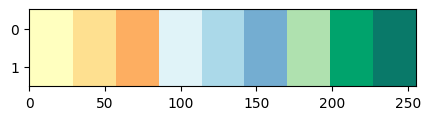

In [23]:
N = 3 # number of colors to extract from each of the base_cmaps below
phyto = [cm_light,cm_temp,cm_nutrients]

n_base = len(phyto)
# we go from 0.2 to 0.8 below to avoid having several whites and blacks in the resulting cmaps
colors_phyto = np.concatenate([plt.get_cmap(name)(np.linspace(0,1,N)) for name in phyto])
cm_phyto = mpl.colors.ListedColormap(colors_phyto)

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots(1,1,figsize=(5,1))
ax.imshow(gradient, aspect='auto', cmap=cm_phyto)

## Create grid, with phytoplankton types in the y axis, and years in the x axis, that are color coded with the most limiting factor. 

In [24]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

In [25]:
years = ['1948','1949','1950','1951','1952','1953','1954','1955','1956','1957','1958','1959',
         "1960",'1961','1962','1963','1964','1965','1966','1967','1968','1969',
         "1970",'1971','1972','1973','1974','1975','1976','1977','1978','1979',
         "1980",'1981','1982','1983','1984','1985','1986','1987','1988','1989',
         "1990",'1991','1992','1993','1994','1995','1996','1997','1998','1999',
         '2000','2001','2002','2003','2004','2005','2006','2007','2008','2009']

1. Western Nordic Sea = `diat3_val.lon[348]`, `diat3_val.lat[158]`
    - Black dot = Western Nordic Region (near greenland) `[68.5$^o$N,348$^o$E]`

2. Eastern Nordic Sea = `diat3_val.lon[2]`,`diat3_val.lat[156]`
    - red dot = Eastern Nordic Region `[66.5$^o$N,2$^o$E]`

3. Central Arctic Ocean  = `diat3_val.lon[200]`,`diat3_val.lat[175]`
    - Blue dot = Central Arctic `[85.5$^o$N, 200$^o$E]`
    
4. Chukchi Sea = = `diat3_val.lon[192]`,`diat3_val.lat[158]`
    - Green dot = Chukchi Sea `[68.5$^o$N, 192$^o$E]`, or `[68.5$^o$N, 168$^o$W]`


In [27]:
diat3_val.lon[192]-360

<xarray.DataArray 'lon' ()>
array(-168.)
Coordinates:
    lon      float64 192.0

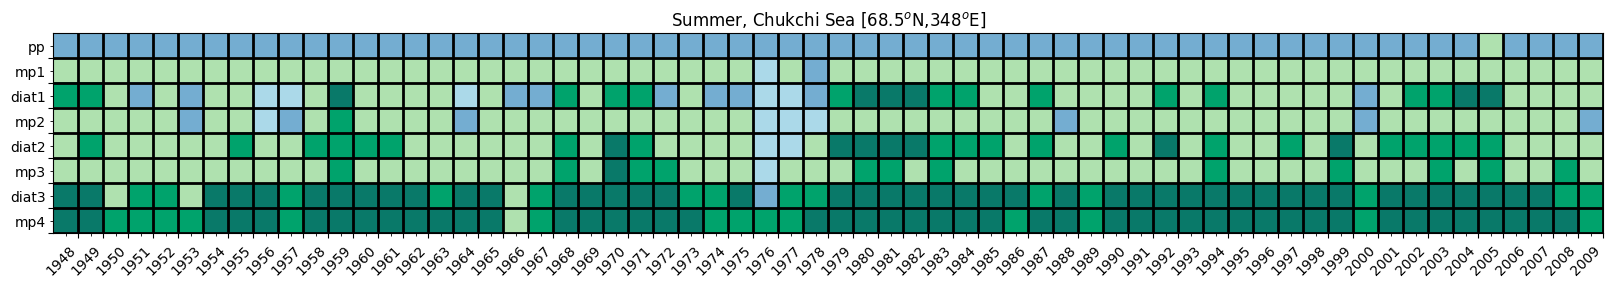

In [28]:
data =  phyto_lims_summer[:,0:62,158,192] # Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm_phyto, vmin=0,vmax=2)


# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticks(np.arange(0, 62, 1), minor=True);
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels([]);
ax.set_yticks(np.arange(0, 8, 1), minor=True);
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'], minor=True)
ax.set_title('Summer, Chukchi Sea [68.5$^o$N,348$^o$E]')

plt.show()
region = 'ao_g'
season = 'summer'
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}central_{region}_{season}_grid.png', dpi=600, bbox_inches='tight')

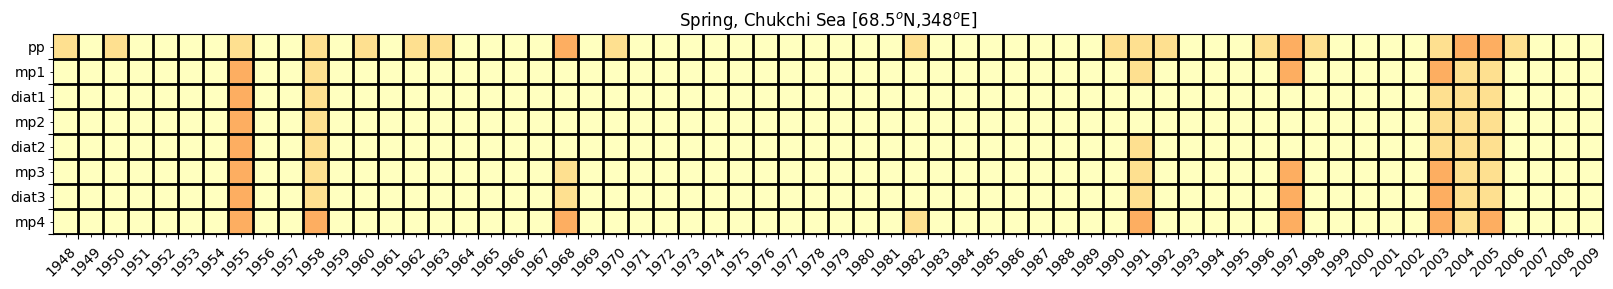

In [29]:
data =  phyto_lims_spring[:,0:62,158,192] # Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm_phyto, vmin=0,vmax=2)


# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticks(np.arange(0, 62, 1), minor=True);
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels([]);
ax.set_yticks(np.arange(0, 8, 1), minor=True);
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'], minor=True)
ax.set_title('Spring, Chukchi Sea [68.5$^o$N,348$^o$E]')

plt.show()
region = 'ao_g'
season = 'spring'
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}central_{region}_{season}_grid.png', dpi=600, bbox_inches='tight')

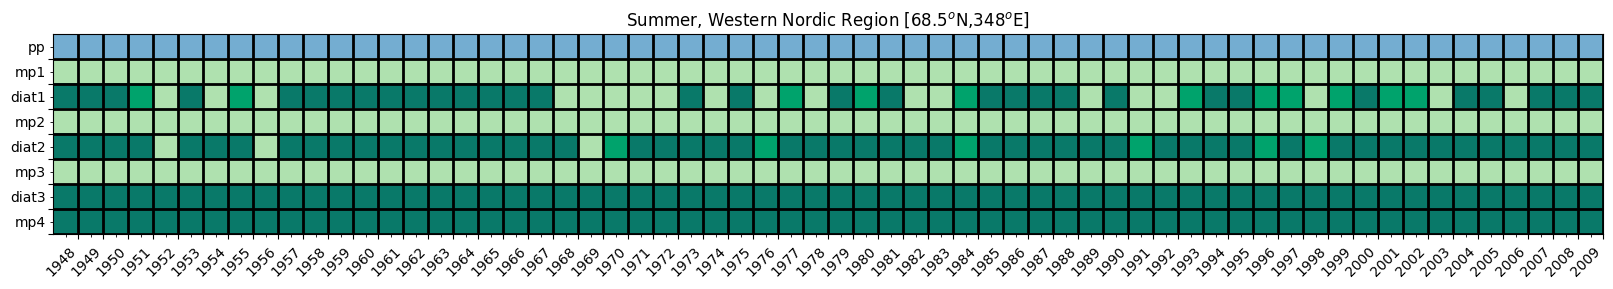

In [87]:
data =  phyto_lims_summer[:,0:62,158,348] # Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm_phyto, vmin=0,vmax=2)


# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticks(np.arange(0, 62, 1), minor=True);
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels([]);
ax.set_yticks(np.arange(0, 8, 1), minor=True);
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'], minor=True)
ax.set_title('Summer, Western Nordic Region [68.5$^o$N,348$^o$E]')

plt.show()
region = 'ao_k'
season = 'summer'
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}central_{region}_{season}_grid.png', dpi=600, bbox_inches='tight')

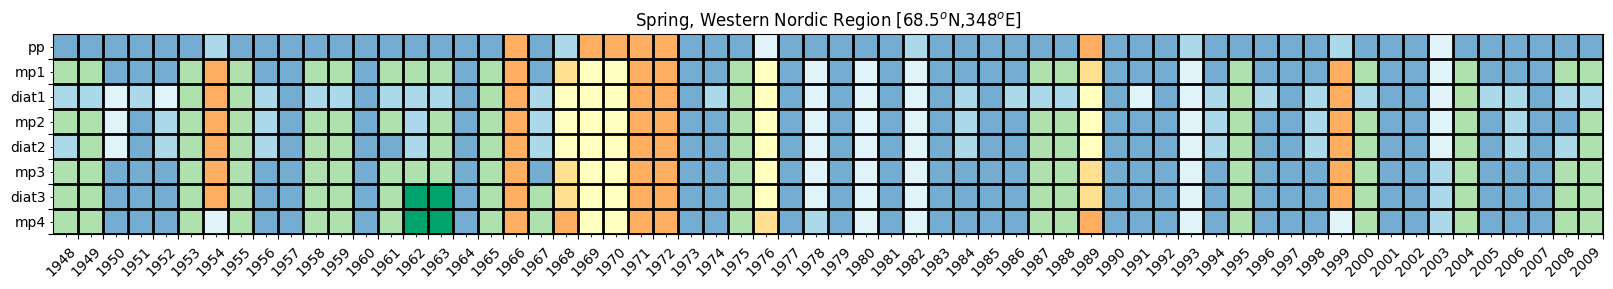

In [94]:
data =  phyto_lims_spring[:,0:62,158,348] # Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm_phyto, vmin=0,vmax=2)


# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticks(np.arange(0, 62, 1), minor=True);
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels([]);
ax.set_yticks(np.arange(0, 8, 1), minor=True);
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'], minor=True)
ax.set_title('Spring, Western Nordic Region [68.5$^o$N,348$^o$E]')

plt.show()
region = 'ao_k'
season = 'spring'
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}central_{region}_{season}_grid.png', dpi=600, bbox_inches='tight')

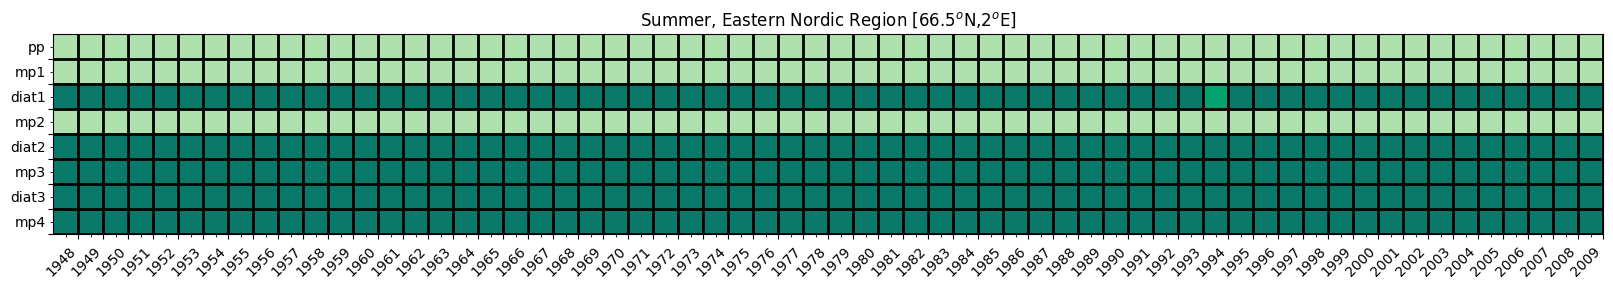

In [89]:
data =  phyto_lims_summer[:,0:62,156,2] # Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm_phyto, vmin=0,vmax=2)


# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticks(np.arange(0, 62, 1), minor=True);
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels([]);
ax.set_yticks(np.arange(0, 8, 1), minor=True);
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'], minor=True)
ax.set_title('Summer, Eastern Nordic Region [66.5$^o$N,2$^o$E]')

plt.show()
region = 'ao_r'
season = 'summer'
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}central_{region}_{season}_grid.png', dpi=600, bbox_inches='tight')

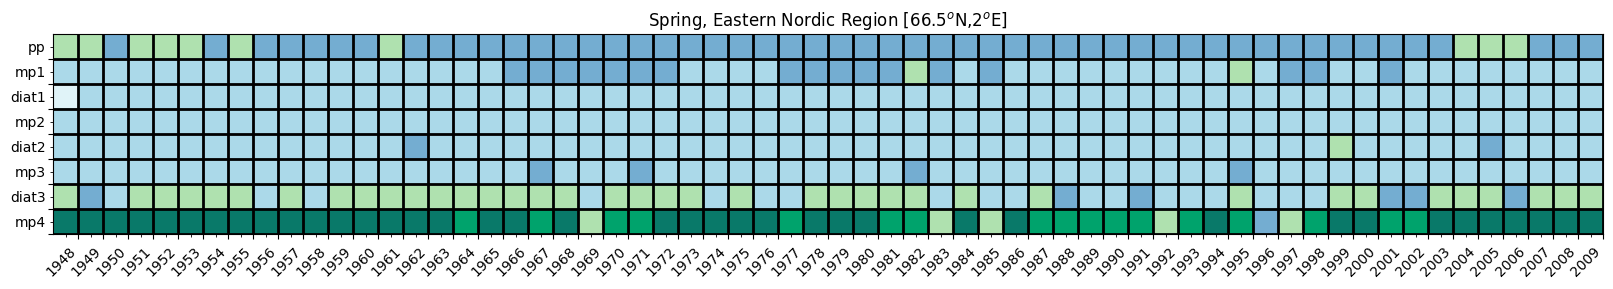

In [90]:
data =  phyto_lims_spring[:,0:62,156,2] # Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm_phyto, vmin=0,vmax=2)


# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticks(np.arange(0, 62, 1), minor=True);
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels([]);
ax.set_yticks(np.arange(0, 8, 1), minor=True);
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'], minor=True)
ax.set_title('Spring, Eastern Nordic Region [66.5$^o$N,2$^o$E]')

plt.show()
region = 'ao_r'
season = 'spring'
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}central_{region}_{season}_grid.png', dpi=600, bbox_inches='tight')

## Central Arctic Ocean 

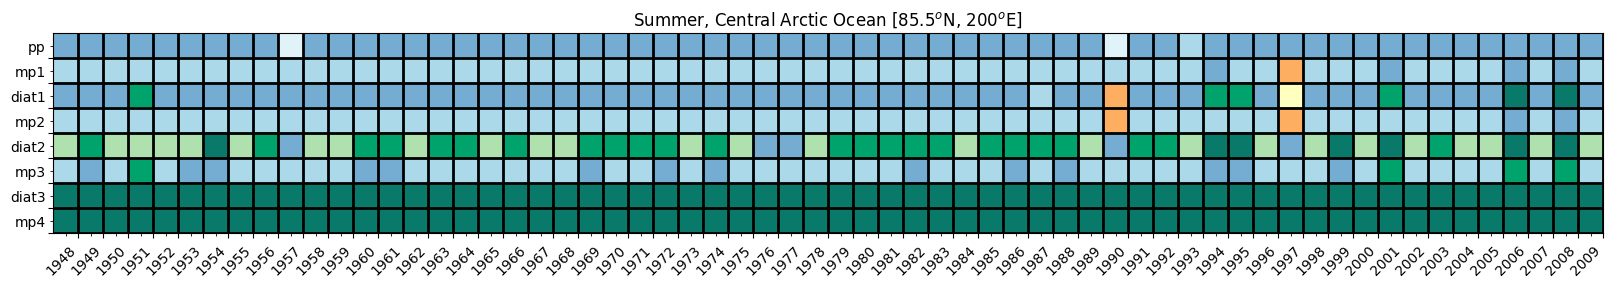

In [91]:
data =  phyto_lims_summer[:,0:62,175,200] # Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm_phyto,vmin=0,vmax=2)


# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticks(np.arange(0, 62, 1), minor=True);
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels([]);
ax.set_yticks(np.arange(0, 8, 1), minor=True);
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'], minor=True)
ax.set_title('Summer, Central Arctic Ocean [85.5$^o$N, 200$^o$E]')

plt.show()
region = 'ao_b'
season = 'summer'
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}central_{region}_{season}_grid.png', dpi=600, bbox_inches='tight')

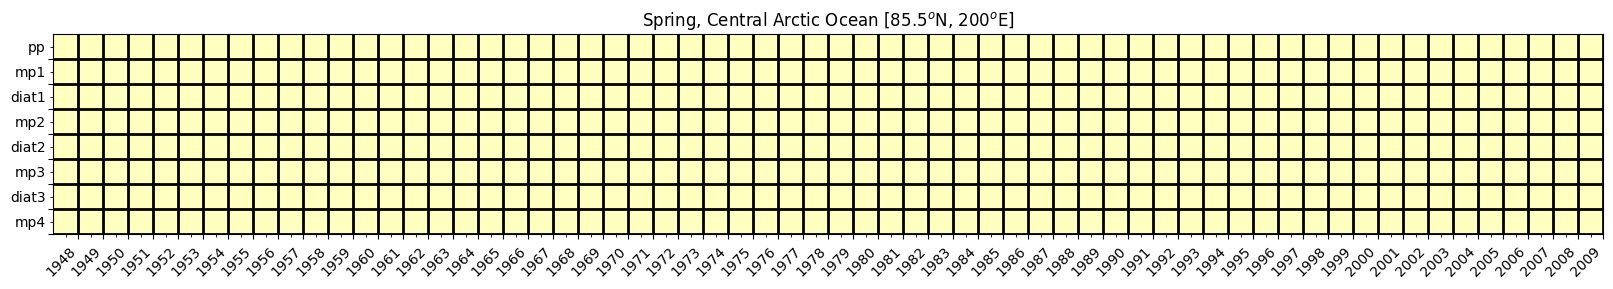

In [93]:
data =  phyto_lims_spring[:,0:62,175,200] # Should be 9 by 63... 

# Create figure 
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(data, cmap=cm_phyto,vmin=0,vmax=2)


# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, 62, 1));
ax.set_xticks(np.arange(0, 62, 1), minor=True);
ax.set_xticklabels(years,rotation=45, ha="right")
ax.set_yticks(np.arange(0.5, 8, 1));
ax.set_yticklabels([]);
ax.set_yticks(np.arange(0, 8, 1), minor=True);
ax.set_yticklabels(['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4'], minor=True)
ax.set_title('Spring, Central Arctic Ocean [85.5$^o$N, 200$^o$E]')

plt.show()
region = 'ao_b'
season = 'spring'
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}central_{region}_{season}_grid.png', dpi=600, bbox_inches='tight')

# Now plot out all of the anomalies

In [30]:
%%time
temp_inds = sorted(glob.glob('/glade/scratch/gabyn/SPECTRA/GNG595_monthly_yearly_1948_2009/regrid/regrid_SPECTRA_TEMP*.nc', recursive=True))
ds= xr.open_mfdataset(temp_inds,concat_dim='time', combine='nested') # Full 62 years of second cycle

CPU times: user 583 ms, sys: 165 ms, total: 749 ms
Wall time: 12.2 s


In [31]:
%%time
temp_ds_inter = np.empty([63,12,180,360])
temp_ds_inter[:] = np.nan
x = np.array(range(0,756,12)) ## this loops from 0 to 2016, and selects every 12th number. 
for i in range(63):
    temp_ds_inter[i,:,:,:] = ds.TEMP[x[i]:x[i]+12,0,:,:]

CPU times: user 11.5 s, sys: 18 s, total: 29.5 s
Wall time: 37.4 s


In [32]:
%%time
temp_inds = sorted(glob.glob('/glade/scratch/gabyn/SPECTRA/GNG595_monthly_yearly_1948_2009/regrid/regrid_SPECTRA_ECOSYS_IFRAC*.nc', recursive=True))
ds= xr.open_mfdataset(temp_inds,concat_dim='time', combine='nested') # Full 62 years of second cycle

	NC4_close: ncid 0xe0000
			nc4_close_hdf5_file: h5->path /glade/u/home/gabyn/scratch/SPECTRA/growth_lim/pp_lim_index_remap.nc abort 0
			nc4_rec_grp_HDF5_del: grp->name /
			closing HDF5 dataset 360287970189639689
			closing HDF5 dataset 360287970189639690
			closing HDF5 dataset 360287970189639691
			closing HDF5 dataset 360287970189639692
			closing HDF5 dataset 360287970189639693
			nc4_close_netcdf4_file: h5->path /glade/u/home/gabyn/scratch/SPECTRA/growth_lim/pp_lim_index_remap.nc abort 0
			nc4_rec_grp_del: grp->name /
			att_free: name CDI 
			att_free: name Conventions 
			att_free: name NCO 
			att_free: name history 
			att_free: name CDO 
			att_free: name standard_name 
			att_free: name units 
			att_free: name calendar 
			att_free: name axis 
			att_free: name standard_name 
			att_free: name long_name 
			att_free: name units 
			att_free: name axis 
			att_free: name standard_name 
			att_free: name long_name 
			att_free: name units 
			att_free: name axis 
			att_fr

CPU times: user 435 ms, sys: 59.1 ms, total: 494 ms
Wall time: 2.21 s


	NC4_close: ncid 0x1b0000
			nc4_close_hdf5_file: h5->path /glade/u/home/gabyn/scratch/SPECTRA/growth_lim/mp3_lim_value_remap.nc abort 0
			nc4_rec_grp_HDF5_del: grp->name /
			closing HDF5 dataset 360287970189639806
			closing HDF5 dataset 360287970189639807
			closing HDF5 dataset 360287970189639808
			closing HDF5 dataset 360287970189639809
			closing HDF5 dataset 360287970189639810
			nc4_close_netcdf4_file: h5->path /glade/u/home/gabyn/scratch/SPECTRA/growth_lim/mp3_lim_value_remap.nc abort 0
			nc4_rec_grp_del: grp->name /
			att_free: name CDI 
			att_free: name Conventions 
			att_free: name NCO 
			att_free: name history 
			att_free: name CDO 
			att_free: name standard_name 
			att_free: name units 
			att_free: name calendar 
			att_free: name axis 
			att_free: name standard_name 
			att_free: name long_name 
			att_free: name units 
			att_free: name axis 
			att_free: name standard_name 
			att_free: name long_name 
			att_free: name units 
			att_free: name axis 
			att

In [33]:
%%time
ECOSYS_IFRAC_ds_inter = np.empty([63,12,180,360])
ECOSYS_IFRAC_ds_inter[:] = np.nan
x = np.array(range(0,756,12)) ## this loops from 0 to 2016, and selects every 12th number. 
for i in range(63):
    ECOSYS_IFRAC_ds_inter[i,:,:,:] = ds.ECOSYS_IFRAC[x[i]:x[i]+12,:,:]

CPU times: user 578 ms, sys: 210 ms, total: 788 ms
Wall time: 1.16 s


In [34]:
%%time
NO3_inds = sorted(glob.glob('/glade/scratch/gabyn/SPECTRA/GNG595_monthly_yearly_1948_2009/regrid/regrid_SPECTRA_NO3*.nc', recursive=True))
ds= xr.open_mfdataset(NO3_inds,concat_dim='time', combine='nested') # Full 62 years of second cycle

CPU times: user 524 ms, sys: 160 ms, total: 684 ms
Wall time: 12.5 s


In [35]:
%%time
NO3_ds_inter = np.empty([63,12,180,360])
NO3_ds_inter[:] = np.nan
x = np.array(range(0,756,12)) ## this loops from 0 to 2016, and selects every 12th number. 
for i in range(63):
    NO3_ds_inter[i,:,:,:] = ds.NO3[x[i]:x[i]+12,0,:,:]

CPU times: user 11.5 s, sys: 17.7 s, total: 29.2 s
Wall time: 40.9 s


In [36]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.gridspec import GridSpec

## The latitudes and longitudes in these are different. the longitude in limitation values goes from 0-360 E, and the longitude in the individual values goes from -180 to 180 E

1. Western Nordic Sea = `diat3_val.lon[348]`, `diat3_val.lat[158]`
    - Black dot = Western Nordic Region (near greenland) `[68.5$^o$N,348$^o$E]`
    - - `ds.lon[168]`, `ds.lat[158]`, `[68.5$^o$N,12$^o$W]`

2. Eastern Nordic Sea = `diat3_val.lon[2]`,`diat3_val.lat[156]`
    - red dot = Eastern Nordic Region `[66.5$^o$N,2$^o$E]`
    - - `ds.lon[182]`, `ds.lat[156]`, `[66.5$^o$N,2$^o$E]`

3. Central Arctic Ocean  = `diat3_val.lon[200]`,`diat3_val.lat[175]`
    - Blue dot = Central Arctic `[85.5$^o$N, 200$^o$E]`
    - - `ds.lon[20]`, `ds.lat[175]`, `[85.5$^o$N,160$^o$W]`
    
4. Chukchi Sea = = `diat3_val.lon[192]`,`diat3_val.lat[158]`
    - Green dot = Chukchi Sea `[68.5$^o$N, 192$^o$E]`, or `[68.5$^o$N, 168$^o$W]`
    - - `ds.lon[12]`, `ds.lat[158]`, `[68.5$^o$N, 168$^o$W]`

In [37]:
ds.lon[12]

<xarray.DataArray 'lon' ()>
array(-168.)
Coordinates:
    lon      float64 -168.0
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X

# Annomaly plots in the summer

In [38]:
temp_ao_b_anom = temp_ds_inter[:,5:8,175,20]-np.nanmean(temp_ds_inter[:,5:8,175,20],axis=0)
temp_ao_k_anom = temp_ds_inter[:,5:8,158,168]-np.nanmean(temp_ds_inter[:,5:8,158,168],axis=0)
temp_ao_r_anom = temp_ds_inter[:,5:8,156,182]-np.nanmean(temp_ds_inter[:,5:8,156,182],axis=0)
temp_ao_g_anom = temp_ds_inter[:,5:8,158,12]-np.nanmean(temp_ds_inter[:,5:8,158,12],axis=0)

NO3_ao_b_anom = NO3_ds_inter[:,5:8,175,20]-np.nanmean(NO3_ds_inter[:,5:8,175,20],axis=0)
NO3_ao_k_anom = NO3_ds_inter[:,5:8,158,168]-np.nanmean(NO3_ds_inter[:,5:8,158,168],axis=0)
NO3_ao_r_anom = NO3_ds_inter[:,5:8,156,182]-np.nanmean(NO3_ds_inter[:,5:8,156,182],axis=0)
NO3_ao_g_anom = NO3_ds_inter[:,5:8,158,12]-np.nanmean(NO3_ds_inter[:,5:8,158,12],axis=0)

ECOSYS_IFRAC_ao_b_anom = ECOSYS_IFRAC_ds_inter[:,5:8,175,20]-np.nanmean(ECOSYS_IFRAC_ds_inter[:,5:8,175,20],axis=0)
ECOSYS_IFRAC_ao_k_anom = ECOSYS_IFRAC_ds_inter[:,5:8,158,168]-np.nanmean(ECOSYS_IFRAC_ds_inter[:,5:8,158,168],axis=0)
ECOSYS_IFRAC_ao_r_anom = ECOSYS_IFRAC_ds_inter[:,5:8,156,182]-np.nanmean(ECOSYS_IFRAC_ds_inter[:,5:8,156,182],axis=0)
ECOSYS_IFRAC_ao_g_anom = ECOSYS_IFRAC_ds_inter[:,5:8,158,12]-np.nanmean(ECOSYS_IFRAC_ds_inter[:,5:8,158,12],axis=0)

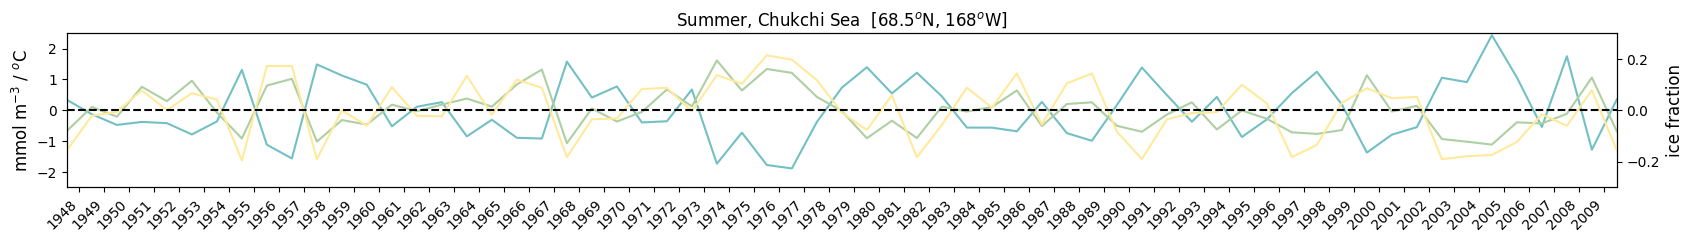

In [42]:
region = 'ao_g'
season = 'summer'
fig = plt.figure(figsize=(20, 2))
ax1 = fig.add_subplot(1,1,1);
ax2=ax1.twinx()
ax1.plot(np.nanmean(temp_ao_g_anom,axis=1),color=cm(1))
ax2.plot(np.nanmean(ECOSYS_IFRAC_ao_g_anom,axis=1),color=cm(0))
ax1.plot(np.nanmean(NO3_ao_g_anom,axis=1), color=cm(2))
ax1.set_title('Summer, Chukchi Sea  [68.5$^o$N, 168$^o$W]', fontsize=12)
ax1.set_xticks(np.arange(0.5, 62, 1));
ax1.set_xticklabels(years,rotation=45, ha="right")
ax1.set_ylim(-2.5,2.5)
ax2.set_ylabel("ice fraction",color='k',fontsize=12)
ax1.set_ylabel("mmol m$^{-3}$ / $^o$C",color="k",fontsize=12)
plt.axhline(y=0, color='k', linestyle='--')
ax2.set_ylim(-0.3,0.3)
ax1.margins(x=0)
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}central_{region}_{season}_anomaly.png', dpi=600, bbox_inches='tight')

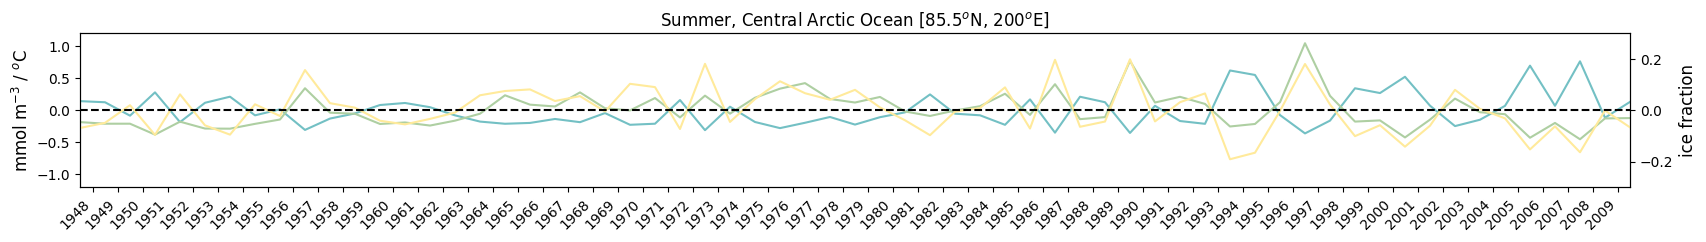

In [96]:
region = 'ao_b'
season = 'summer'
fig = plt.figure(figsize=(20, 2))
ax1 = fig.add_subplot(1,1,1);
ax2=ax1.twinx()
ax1.plot(np.nanmean(temp_ao_b_anom,axis=1),color=cm(1))
ax2.plot(np.nanmean(ECOSYS_IFRAC_ao_b_anom,axis=1),color=cm(0))
ax1.plot(np.nanmean(NO3_ao_b_anom,axis=1), color=cm(2))
ax1.set_title('Summer, Central Arctic Ocean [85.5$^o$N, 200$^o$E]', fontsize=12)
ax1.set_xticks(np.arange(0.5, 62, 1));
ax1.set_xticklabels(years,rotation=45, ha="right")
ax1.set_ylim(-1.2,1.2)
ax2.set_ylabel("ice fraction",color='k',fontsize=12)
ax1.set_ylabel("mmol m$^{-3}$ / $^o$C",color="k",fontsize=12)
plt.axhline(y=0, color='k', linestyle='--')
ax2.set_ylim(-0.3,0.3)
ax1.margins(x=0)
region = 'ao_b'
season = 'summer'
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}central_{region}_{season}_anomaly.png', dpi=600, bbox_inches='tight')

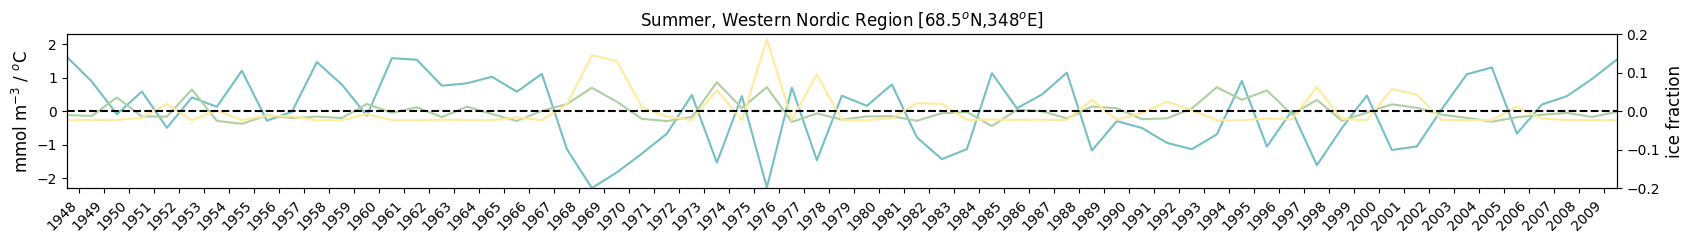

In [100]:
region = 'ao_k'
season = 'summer'
fig = plt.figure(figsize=(20, 2))
ax1 = fig.add_subplot(1,1,1);
ax2=ax1.twinx()
ax1.plot(np.nanmean(temp_ao_k_anom,axis=1),color=cm(1))
ax2.plot(np.nanmean(ECOSYS_IFRAC_ao_k_anom,axis=1),color=cm(0))
ax1.plot(np.nanmean(NO3_ao_k_anom,axis=1), color=cm(2))
ax1.set_title('Summer, Western Nordic Region [68.5$^o$N,348$^o$E]', fontsize=12)
ax1.set_xticks(np.arange(0.5, 62, 1));
ax1.set_xticklabels(years,rotation=45, ha="right")
ax1.set_ylim(-2.3,2.3)
ax2.set_ylabel("ice fraction",color='k',fontsize=12)
ax1.set_ylabel("mmol m$^{-3}$ / $^o$C",color="k",fontsize=12)
plt.axhline(y=0, color='k', linestyle='--')
ax2.set_ylim(-0.2,0.2)
ax1.margins(x=0)
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}central_{region}_{season}_anomaly.png', dpi=600, bbox_inches='tight')

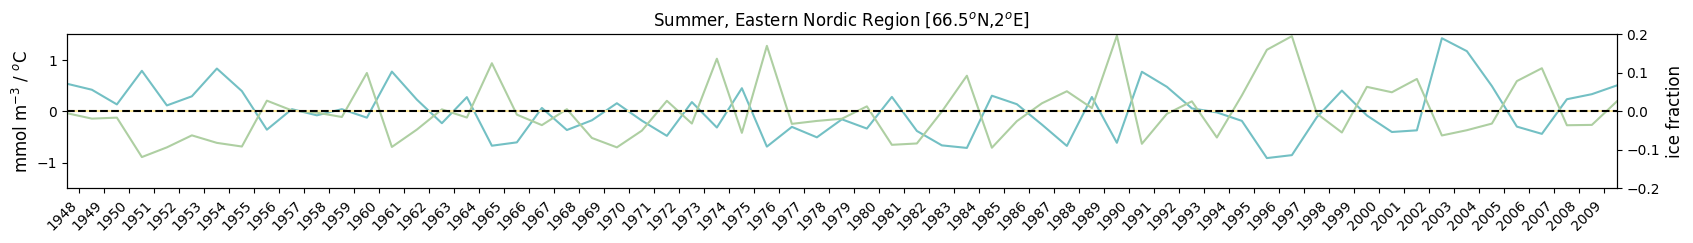

In [101]:
region = 'ao_r'
season = 'summer'
fig = plt.figure(figsize=(20, 2))
ax1 = fig.add_subplot(1,1,1);
ax2=ax1.twinx()
ax1.plot(np.nanmean(temp_ao_r_anom,axis=1),color=cm(1))
ax2.plot(np.nanmean(ECOSYS_IFRAC_ao_r_anom,axis=1),color=cm(0))
ax1.plot(np.nanmean(NO3_ao_r_anom,axis=1), color=cm(2))
ax1.set_title('Summer, Eastern Nordic Region [66.5$^o$N,2$^o$E]', fontsize=12)
ax1.set_xticks(np.arange(0.5, 62, 1));
ax1.set_xticklabels(years,rotation=45, ha="right")
ax1.set_ylim(-1.5,1.5)
ax2.set_ylabel("ice fraction",color='k',fontsize=12)
ax1.set_ylabel("mmol m$^{-3}$ / $^o$C",color="k",fontsize=12)
plt.axhline(y=0, color='k', linestyle='--')
ax2.set_ylim(-0.2,0.2)
ax1.margins(x=0)
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}central_{region}_{season}_anomaly.png', dpi=600, bbox_inches='tight')

## Annomaly plots in the spring

In [102]:
temp_ao_b_anom = temp_ds_inter[:,2:5,175,20]-np.nanmean(temp_ds_inter[:,2:5,175,20],axis=0)
temp_ao_k_anom = temp_ds_inter[:,2:5,158,168]-np.nanmean(temp_ds_inter[:,2:5,158,168],axis=0)
temp_ao_r_anom = temp_ds_inter[:,2:5,156,182]-np.nanmean(temp_ds_inter[:,2:5,156,182],axis=0)

NO3_ao_b_anom = NO3_ds_inter[:,2:5,175,20]-np.nanmean(NO3_ds_inter[:,2:5,175,20],axis=0)
NO3_ao_k_anom = NO3_ds_inter[:,2:5,158,168]-np.nanmean(NO3_ds_inter[:,2:5,158,168],axis=0)
NO3_ao_r_anom = NO3_ds_inter[:,2:5,156,182]-np.nanmean(NO3_ds_inter[:,2:5,156,182],axis=0)

ECOSYS_IFRAC_ao_b_anom = ECOSYS_IFRAC_ds_inter[:,2:5,175,20]-np.nanmean(ECOSYS_IFRAC_ds_inter[:,2:5,175,20],axis=0)
ECOSYS_IFRAC_ao_k_anom = ECOSYS_IFRAC_ds_inter[:,2:5,158,168]-np.nanmean(ECOSYS_IFRAC_ds_inter[:,2:5,158,168],axis=0)
ECOSYS_IFRAC_ao_r_anom = ECOSYS_IFRAC_ds_inter[:,2:5,156,182]-np.nanmean(ECOSYS_IFRAC_ds_inter[:,2:5,156,182],axis=0)

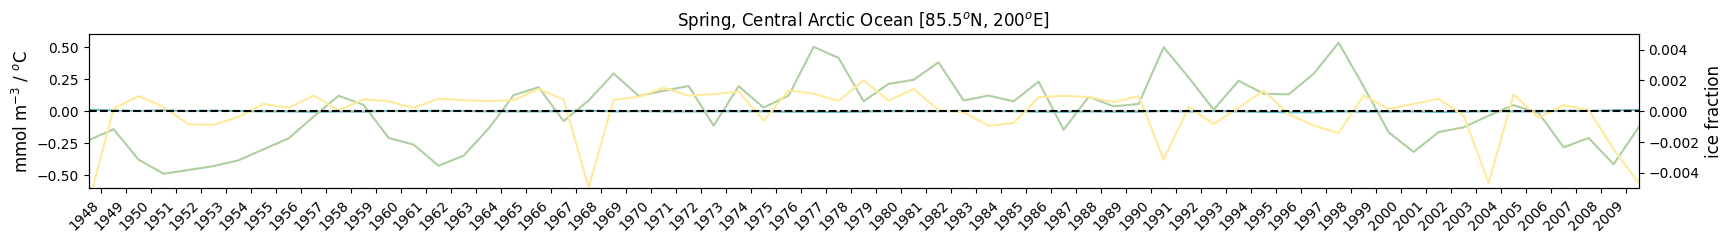

In [111]:
fig = plt.figure(figsize=(20, 2))
ax1 = fig.add_subplot(1,1,1);
ax2=ax1.twinx()
ax1.plot(np.nanmean(temp_ao_b_anom,axis=1),color=cm(1))
ax2.plot(np.nanmean(ECOSYS_IFRAC_ao_b_anom,axis=1),color=cm(0))
ax1.plot(np.nanmean(NO3_ao_b_anom,axis=1), color=cm(2))
ax1.set_title('Spring, Central Arctic Ocean [85.5$^o$N, 200$^o$E]', fontsize=12)
ax1.set_xticks(np.arange(0.5, 62, 1));
ax1.set_xticklabels(years,rotation=45, ha="right")
ax1.set_ylim(-0.6,0.6)
ax2.set_ylabel("ice fraction",color='k',fontsize=12)
ax1.set_ylabel("mmol m$^{-3}$ / $^o$C",color="k",fontsize=12)
plt.axhline(y=0, color='k', linestyle='--')
ax2.set_ylim(-0.005,0.005)
ax1.margins(x=0)
region = 'ao_b'
season = 'spring'
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}central_{region}_{season}_anomaly.png', dpi=600, bbox_inches='tight')

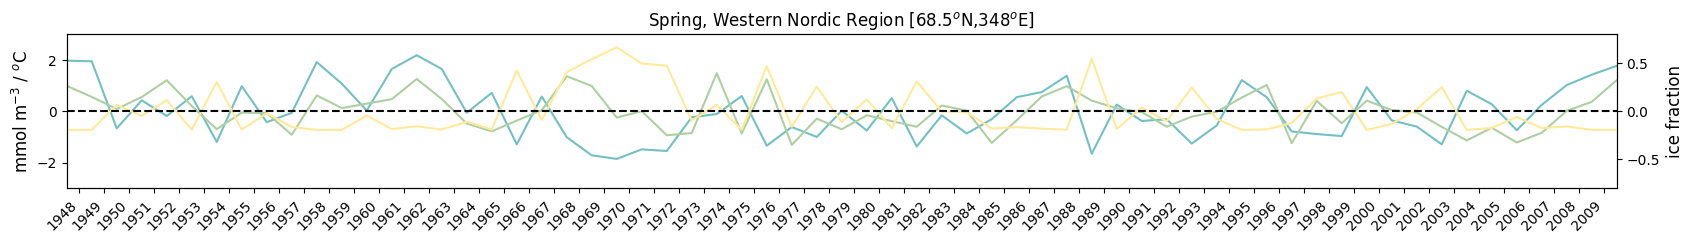

In [113]:
region = 'ao_k'
season = 'spring'
fig = plt.figure(figsize=(20, 2))
ax1 = fig.add_subplot(1,1,1);
ax2=ax1.twinx()
ax1.plot(np.nanmean(temp_ao_k_anom,axis=1),color=cm(1))
ax2.plot(np.nanmean(ECOSYS_IFRAC_ao_k_anom,axis=1),color=cm(0))
ax1.plot(np.nanmean(NO3_ao_k_anom,axis=1), color=cm(2))
ax1.set_title('Spring, Western Nordic Region [68.5$^o$N,348$^o$E]', fontsize=12)
ax1.set_xticks(np.arange(0.5, 62, 1));
ax1.set_xticklabels(years,rotation=45, ha="right")
ax1.set_ylim(-3,3)
ax2.set_ylabel("ice fraction",color='k',fontsize=12)
ax1.set_ylabel("mmol m$^{-3}$ / $^o$C",color="k",fontsize=12)
plt.axhline(y=0, color='k', linestyle='--')
ax2.set_ylim(-0.8,0.8)
ax1.margins(x=0)
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}central_{region}_{season}_anomaly.png', dpi=600, bbox_inches='tight')

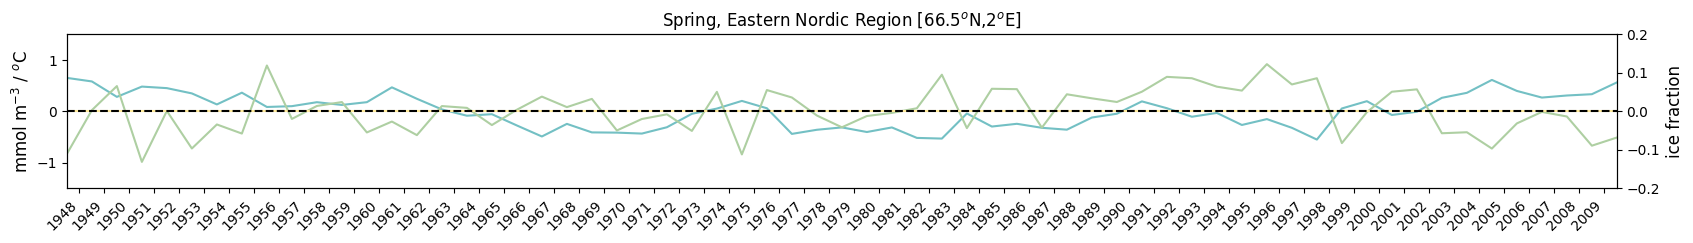

In [106]:
region = 'ao_r'
season = 'spring'
fig = plt.figure(figsize=(20, 2))
ax1 = fig.add_subplot(1,1,1);
ax2=ax1.twinx()
ax1.plot(np.nanmean(temp_ao_r_anom,axis=1),color=cm(1))
ax2.plot(np.nanmean(ECOSYS_IFRAC_ao_r_anom,axis=1),color=cm(0))
ax1.plot(np.nanmean(NO3_ao_r_anom,axis=1), color=cm(2))
ax1.set_title('Spring, Eastern Nordic Region [66.5$^o$N,2$^o$E]', fontsize=12)
ax1.set_xticks(np.arange(0.5, 62, 1));
ax1.set_xticklabels(years,rotation=45, ha="right")
ax1.set_ylim(-1.5,1.5)
ax2.set_ylabel("ice fraction",color='k',fontsize=12)
ax1.set_ylabel("mmol m$^{-3}$ / $^o$C",color="k",fontsize=12)
plt.axhline(y=0, color='k', linestyle='--')
ax2.set_ylim(-0.2,0.2)
ax1.margins(x=0)
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}central_{region}_{season}_anomaly.png', dpi=600, bbox_inches='tight')